In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split   
import math

In [36]:
data = pd.read_csv("dataset/3_exam.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
hours    20 non-null float64
pass     20 non-null int64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [37]:
data

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [6]:
data.describe()

,hours,pass
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


In [12]:
data[data["pass"]==1].count()

hours    10
pass     10
dtype: int64

In [13]:
X = data[['hours']]
X.head()

,hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50


In [14]:
Y = data[['pass']]
Y.head()

,pass
0,0
1,0
2,0
3,0
4,0


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()

In [18]:
from sklearn.utils.validation import column_or_1d
clf.fit(X_train, column_or_1d(Y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.coef_
#tuong ung voi intercept, 

array([[0.48978284]])

In [20]:
clf.predict_proba(X_test)

array([[0.23737208, 0.76262792],
       [0.19591363, 0.80408637],
       [0.57498198, 0.42501802],
       [0.6045961 , 0.3954039 ]])

In [21]:
print('score Scikit learn - Train: ', clf.score(X_train,Y_train))

score Scikit learn - Train:  0.75


In [22]:
print('score Scikit learn - test: ', clf.score(X_test,Y_test))

score Scikit learn - test:  1.0


In [23]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 0, 0])

In [24]:
Y_test

,pass
16,1
18,1
4,0
3,0


In [25]:
from sklearn.metrics import accuracy_score 
print("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"%") 

Accuracy is  100.0 %


In [26]:
X_now = [[1.5],[4.0]]
Y_now = clf.predict(X_now)
Y_now

array([0, 1])

In [27]:
clf.coef_
#tuong ung voi intercept, 

array([[0.48978284]])

In [28]:
from scipy.stats import linregress
info = linregress(X["hours"].tolist(), Y["pass"].tolist())
info

LinregressResult(slope=0.23459561219317937, intercept=-0.15393526898848753, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.05812562246900922)

In [29]:
# if learning in 4 hours
p = 1/(1 + math.exp(-(info.slope * 4 + info.intercept)))
p

0.6866377906186065

In [30]:
import numpy
a = numpy.corrcoef(X["hours"].tolist(), Y["pass"].tolist())[0, 1]
a

0.689243146277994

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X_new = np.linspace(0, 6, 1000).reshape(-1, 1) # hours
y_proba = clf.predict_proba(X_new)
y_proba.shape

(1000, 2)

In [32]:
y_proba[:10,]

array([[0.73824782, 0.26175218],
       [0.73767899, 0.26232101],
       [0.73710936, 0.26289064],
       [0.73653893, 0.26346107],
       [0.73596771, 0.26403229],
       [0.7353957 , 0.2646043 ],
       [0.73482289, 0.26517711],
       [0.73424929, 0.26575071],
       [0.7336749 , 0.2663251 ],
       [0.73309973, 0.26690027]])

Text(0, 0.5, 'Probability')

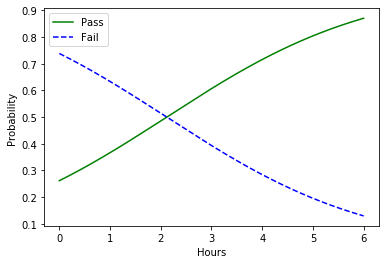

In [33]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Pass")
plt.plot(X_new, y_proba[:, 0], "b--", label="Fail")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Probability")
# + more Matplotlib code to make the image look pretty